# Importing libraries

In [1]:
import pandas as pd

# Importing Data

In [2]:
dataset = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv")

In [3]:
dataset

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6
...,...,...,...,...,...
162,B,C,3,2,44
163,B,E,3,1,40
164,C,D,4,3,25
165,A,B,3,2,44


In [4]:
dataset.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


## converting the string values in the x to its numerical values 

In [8]:
dataset["Motor"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 167 entries, 0 to 166
Series name: Motor
Non-Null Count  Dtype 
--------------  ----- 
167 non-null    object
dtypes: object(1)
memory usage: 1.4+ KB


In [9]:
dataset["Motor"].unique()

array(['E', 'B', 'D', 'C', 'A'], dtype=object)

In [10]:
dataset["Screw"].unique()

array(['E', 'D', 'A', 'B', 'C'], dtype=object)

In [15]:
dataset = dataset.replace({"Screw":{'E':5, 'B':2, 'D':4, 'C':3, 'A':1},"Motor":{'E':5, 'B':2, 'D':4, 'C':3, 'A':1}})

In [16]:
dataset

,Motor,Screw,Pgain,Vgain,Class
0,5,5,5,4,4
1,2,4,6,5,11
2,4,4,4,3,6
3,2,1,3,2,48
4,4,2,6,5,6
...,...,...,...,...,...
162,2,3,3,2,44
163,2,5,3,1,40
164,3,4,4,3,25
165,1,2,3,2,44


# Defining the x and y 

In [17]:
y = dataset.loc[:,'Class']
x = dataset.loc[:,("Motor","Screw","Pgain","Vgain")]


In [18]:
x

,Motor,Screw,Pgain,Vgain
0,5,5,5,4
1,2,4,6,5
2,4,4,4,3
3,2,1,3,2
4,4,2,6,5
...,...,...,...,...
162,2,3,3,2
163,2,5,3,1
164,3,4,4,3
165,1,2,3,2


In [19]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [20]:
import sklearn 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [23]:
x_train

,Motor,Screw,Pgain,Vgain
158,4,2,4,3
2,4,4,4,3
100,2,3,4,2
126,3,3,3,1
68,3,1,5,2
...,...,...,...,...
71,4,1,4,2
106,5,2,4,1
14,3,3,5,4
92,1,1,4,3


In [24]:
x_test.shape

(34, 4)

In [25]:
from sklearn.linear_model import LinearRegression 

In [26]:
model = LinearRegression()

In [27]:
model.fit(x_train, y_train)

LinearRegression()

In [31]:
predicted = model.predict(x_test)

In [32]:
import seaborn as sns

<Axes: xlabel='Class'>

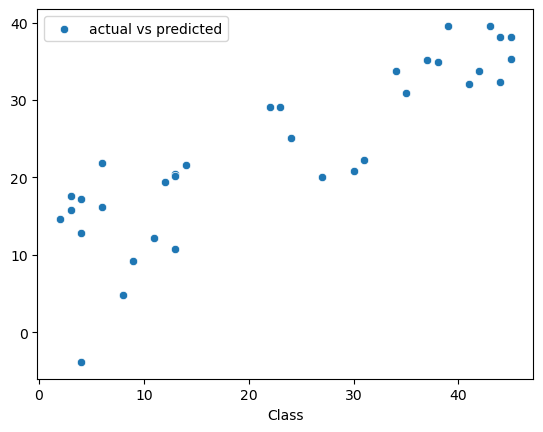

In [39]:
sns.scatterplot(x=y_test, y = predicted, label="actual vs predicted")

# evaluating the metrix

In [44]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_test,predicted)*100

71.91490505791933

In [52]:
import numpy as np

In [53]:
input = np.array([2,4,6,5])

In [57]:
model.predict(input.reshape(1,-1))

/Users/yash/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.47793956])